In [1]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os

from ultralytics import YOLO



c:\Users\SATYAM\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#load model

model = YOLO("yolov8n.yaml")
model = YOLO("yolov8n.pt") 


                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.C2f                   [256,

In [19]:
# use the model
results = model.train(data="dl08.yaml",epochs=15)

yolo\engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=dl08.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.001, warmup_epochs=3.0, warmup_momentum=0.8

In [24]:
validation = model.val(data="dl08.yaml")

Ultralytics YOLOv8.0.0  Python-3.10.5 torch-2.2.1+cpu CPU
Fusing layers... 
Model summary: 168 layers, 3005843 parameters, 12675 gradients, 8.1 GFLOPs
val: Scanning D:\Projects\DL08\data\valid\labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
                   all         10         34    0.00233      0.206    0.00238    0.00106
Speed: 4.6ms pre-process, 208.4ms inference, 0.0ms loss, 50.1ms post-process per image


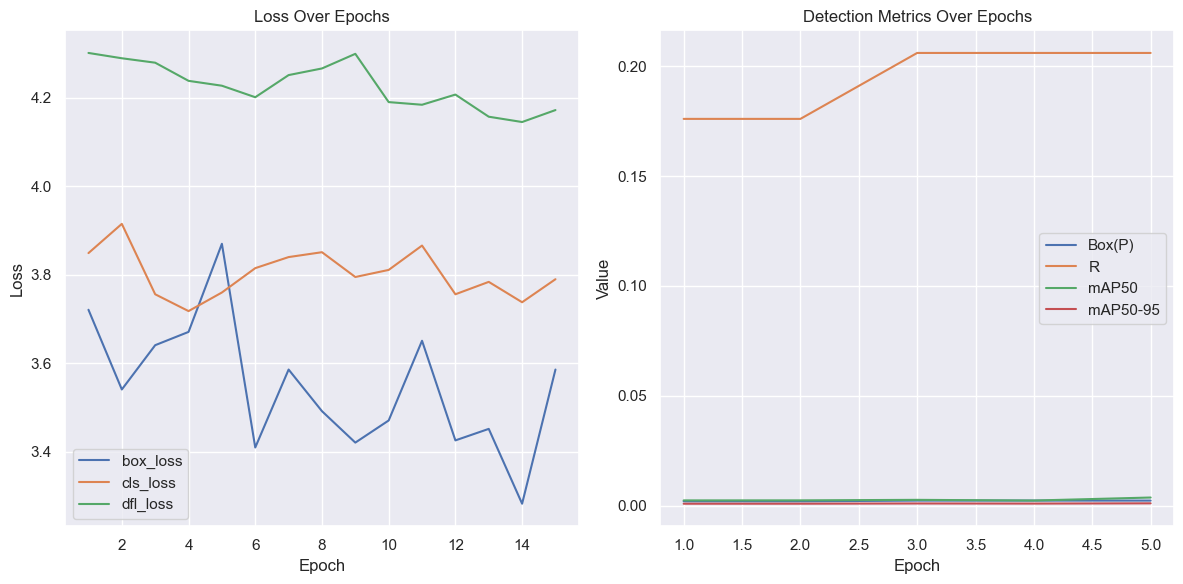

In [20]:
import matplotlib.pyplot as plt

# Data for loss values
epochs = list(range(1, 16))
box_loss = [3.721, 3.541, 3.641, 3.671, 3.87, 3.41, 3.586, 3.492, 3.421, 3.471, 3.651, 3.426, 3.452, 3.283, 3.586]
cls_loss = [3.849, 3.915, 3.756, 3.718, 3.76, 3.815, 3.84, 3.851, 3.795, 3.811, 3.866, 3.756, 3.784, 3.738, 3.79]
dfl_loss = [4.301, 4.289, 4.279, 4.238, 4.227, 4.201, 4.251, 4.266, 4.299, 4.19, 4.184, 4.207, 4.157, 4.145, 4.172]

# Data for detection metrics
Box_P = [0.002, 0.002, 0.00233, 0.00233, 0.00233]
R = [0.176, 0.176, 0.206, 0.206, 0.206]
mAP50 = [0.00242, 0.00244, 0.00267, 0.00236, 0.00373]
mAP50_95 = [0.000914, 0.000923, 0.00102, 0.000974, 0.00109]

# Plotting loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, box_loss, label='box_loss')
plt.plot(epochs, cls_loss, label='cls_loss')
plt.plot(epochs, dfl_loss, label='dfl_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)

# Plotting detection metrics
plt.subplot(1, 2, 2)
plt.plot(epochs[:5], Box_P, label='Box(P)')
plt.plot(epochs[:5], R, label='R')
plt.plot(epochs[:5], mAP50, label='mAP50')
plt.plot(epochs[:5], mAP50_95, label='mAP50-95')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Detection Metrics Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


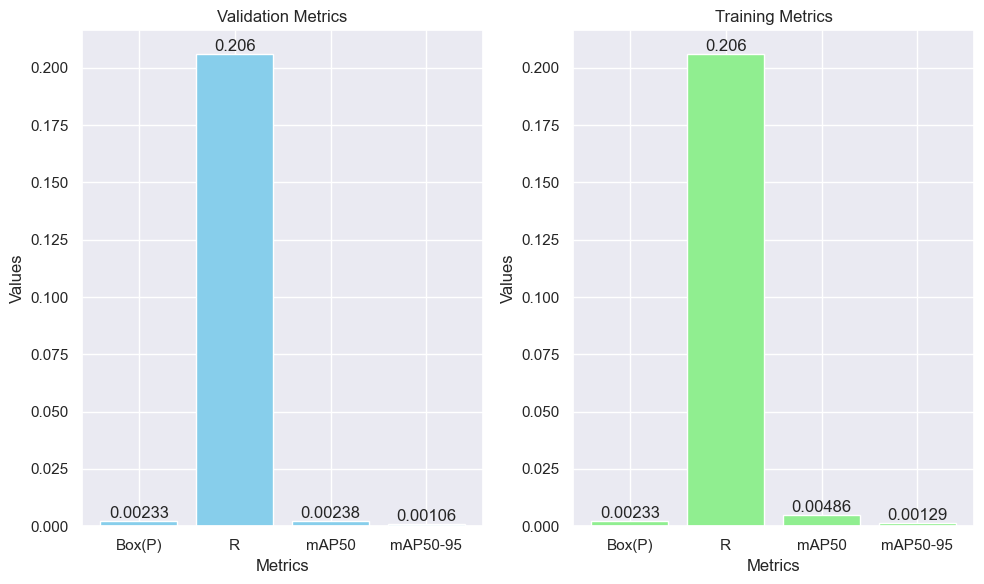

In [26]:
import matplotlib.pyplot as plt

# Validation data
val_metrics = {'Box(P)': 0.00233, 'R': 0.206, 'mAP50': 0.00238, 'mAP50-95': 0.00106}

# Training data
train_metrics = {'Box(P)': 0.00233, 'R': 0.206, 'mAP50': 0.00486, 'mAP50-95': 0.00129}

# Plotting
plt.figure(figsize=(10, 6))

# Validation results
plt.subplot(1, 2, 1)
plt.bar(val_metrics.keys(), val_metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Validation Metrics')
for key, value in val_metrics.items():
    plt.text(key, value, str(round(value, 5)), ha='center', va='bottom')

# Training results
plt.subplot(1, 2, 2)
plt.bar(train_metrics.keys(), train_metrics.values(), color='lightgreen')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Training Metrics')
for key, value in train_metrics.items():
    plt.text(key, value, str(round(value, 5)), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [42]:
results = model('data/valid/images/Image_10_png.rf.eafcb6a419388aa43616a3975854079c.jpg')

Ultralytics YOLOv8.0.0  Python-3.10.5 torch-2.2.1+cpu CPU
Fusing layers... 
Model summary: 168 layers, 3005843 parameters, 12675 gradients, 8.1 GFLOPs
image 1/1 D:\Projects\DL08\data\valid\images\Image_10_png.rf.eafcb6a419388aa43616a3975854079c.jpg: 640x640 2524.1ms
Speed: 29.0ms pre-process, 2524.1ms inference, 49.0ms postprocess per image at shape (1, 3, 640, 640)


In [44]:
import cv2

In [ ]:
results = model((['Image_50.png']))
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    result.save(filename='result.jpg')

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

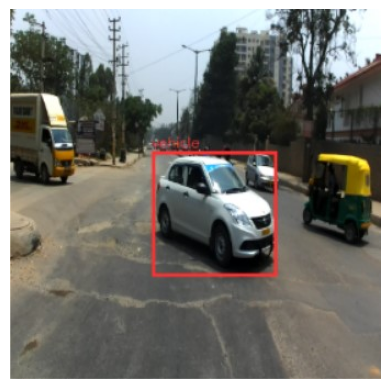

In [9]:
img = mpimg.imread('D:/Projects/DL08/result01.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()